In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numby as nb

data = pd.read_csv("twitchdata-update.csv")


data.head()


,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [2]:

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64


In [3]:
# Check unique values in categorical variables
print("Unique values in 'Language' column:", data['Language'].unique())

# Summary statistics for numerical variables
print("\nSummary statistics for numerical variables:")
print(data.describe())


Unique values in 'Language' column: ['English' 'Portuguese' 'Spanish' 'German' 'Korean' 'French' 'Russian'
 'Japanese' 'Chinese' 'Czech' 'Turkish' 'Italian' 'Polish' 'Thai' 'Arabic'
 'Slovak' 'Other' 'Hungarian' 'Greek' 'Finnish' 'Swedish']

Summary statistics for numerical variables:
       Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160000   37065.051000   
std           5.496355e+08          85376.201364   60314.307686   
min           1.221928e+08           3465.000000     496.000000   
25%           1.631899e+08          73758.750000    9113.750000   
50%           2.349908e+08         108240.000000   16676.000000   
75%           4.337399e+08         141843.750000   37569.750000   
max           6.196162e+09         521445.000000  639375.000000   

       Average viewers     Followers  Followers gained  Views gained  
count      1000.000000  1.000000e+03   

In [5]:
# Check for rows where 'Followers gained' is negative
negative_followers_gained = data[data['Followers gained'] < 0]
print("Rows with negative 'Followers gained':\n", negative_followers_gained)


Rows with negative 'Followers gained':
             Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
499            Amaz            235255500                 84525         12652   
656   TSM_TheOddOne            181908120                188445          4363   
997  마스카 (newmasca)            122452320                217410          6431   

     Average viewers  Followers  Followers gained  Views gained  Partnered  \
499             2764     915023             -5405       4237993       True   
656              913     864087            -15772       6370949       True   
997              567     109068             -4942       3417970       True   

     Mature Language  
499   False  English  
656   False  English  
997   False   Korean  


In [6]:
# Sort the dataset by 'Followers' column in descending order
sorted_by_followers = data.sort_values(by='Followers', ascending=False)

# Display the top channels with the most followers
print("Top Channels by Followers:")
print(sorted_by_followers[['Channel', 'Followers']].head(10))


Top Channels by Followers:
                   Channel  Followers
4                     Tfue    8938903
96                  shroud    7744066
35                    Myth    6726893
13                  Rubius    5751354
90                pokimane    5367605
1                 summit1g    5310163
10            TimTheTatman    5265659
87                 dakotaz    4520305
12  Riot Games (riotgames)    4487489
23            DrDisrespect    4450718


In [7]:
# Calculate descriptive statistics for numerical variables
descriptive_stats = data.describe()

# Display the descriptive statistics
print("Descriptive Statistics for Numerical Variables:")
print(descriptive_stats)


Descriptive Statistics for Numerical Variables:
       Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160000   37065.051000   
std           5.496355e+08          85376.201364   60314.307686   
min           1.221928e+08           3465.000000     496.000000   
25%           1.631899e+08          73758.750000    9113.750000   
50%           2.349908e+08         108240.000000   16676.000000   
75%           4.337399e+08         141843.750000   37569.750000   
max           6.196162e+09         521445.000000  639375.000000   

       Average viewers     Followers  Followers gained  Views gained  
count      1000.000000  1.000000e+03      1.000000e+03  1.000000e+03  
mean       4781.040000  5.700541e+05      2.055185e+05  1.166817e+07  
std        8453.684965  8.044134e+05      3.399137e+05  2.490572e+07  
min         235.000000  3.660000e+03     -1.577200e+04  1.757880

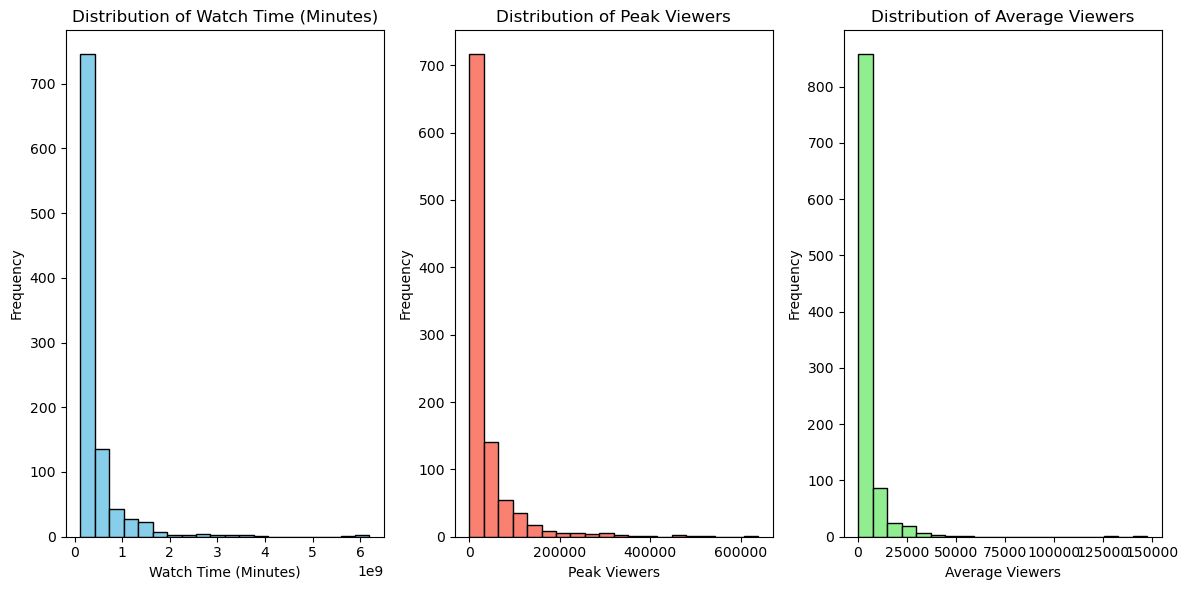

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(data['Watch time(Minutes)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Watch Time (Minutes)')
plt.xlabel('Watch Time (Minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['Peak viewers'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Peak Viewers')
plt.xlabel('Peak Viewers')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['Average viewers'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Average Viewers')
plt.xlabel('Average Viewers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

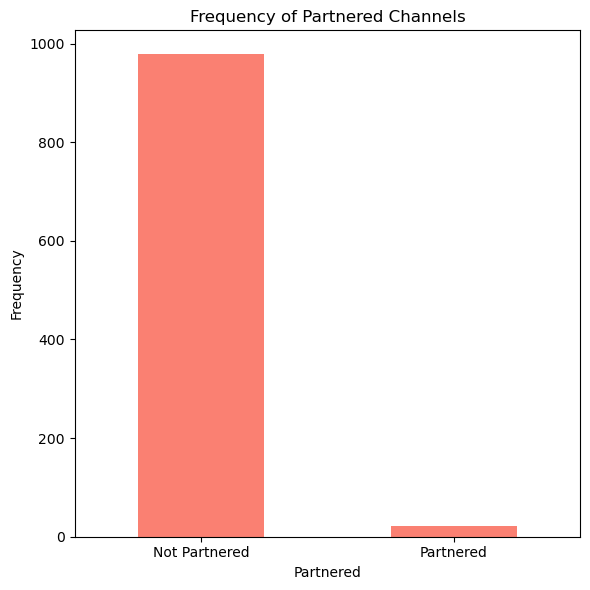

In [12]:
# Count the frequency of 'Partnered' channels
partnered_counts = data['Partnered'].value_counts()

# Create a bar chart for 'Partnered' channels
plt.figure(figsize=(6, 6))
partnered_counts.plot(kind='bar', color='salmon')
plt.title('Frequency of Partnered Channels')
plt.xlabel('Partnered')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Not Partnered', 'Partnered'], rotation=0)
plt.tight_layout()
plt.show()


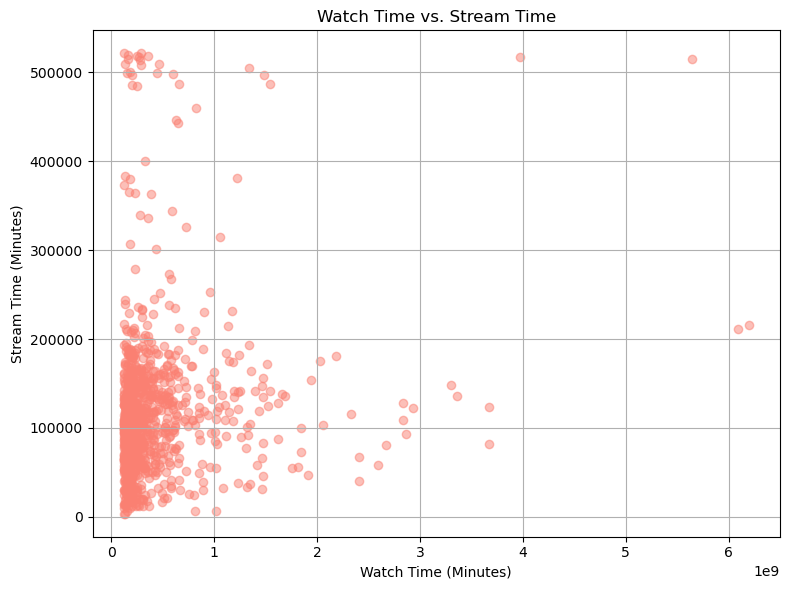

In [13]:
# Create scatter plot for 'Watch time (Minutes)' vs. 'Stream time (minutes)'
plt.figure(figsize=(8, 6))
plt.scatter(data['Watch time(Minutes)'], data['Stream time(minutes)'], color='salmon', alpha=0.5)
plt.title('Watch Time vs. Stream Time')
plt.xlabel('Watch Time (Minutes)')
plt.ylabel('Stream Time (Minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Selecting only numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
Watch time(Minutes)              1.000000              0.150588      0.582797   
Stream time(minutes)             0.150588              1.000000     -0.119540   
Peak viewers                     0.582797             -0.119540      1.000000   
Average viewers                  0.476165             -0.249248      0.682637   
Followers                        0.620234             -0.091299      0.532529   
Followers gained                 0.514648             -0.158165      0.470415   
Views gained                     0.529862              0.064370      0.298063   

                      Average viewers  Followers  Followers gained  \
Watch time(Minutes)          0.476165   0.620234          0.514648   
Stream time(minutes)        -0.249248  -0.091299         -0.158165   
Peak viewers                 0.682637   0.532529          0.470415   
Average viewers              1.000000   0.428303   